First choice: Stroke Prediction

Source of data: Kaggle

Brief description of data: The dataset contains information about patients, including demographic, health, and lifestyle factors, to predict the likelihood of having a stroke.

What is the target? The target is the 'stroke' variable, indicating whether a patient had a stroke (1) or not (0).

What does one row represent? One row represents a patient and their associated information.

Is this a classification or regression problem? This is a classification problem, as the goal is to predict whether a patient had a stroke or not.

How many features does the data have? The data has 11 features, excluding the unique identifier 'id'.

How many rows are in the dataset? 5100

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? Some challenges might include handling missing or unknown data, particularly in the 'smoking_status' feature, and balancing the dataset if there is a significant class imbalance between stroke and non-stroke cases.

Second choice: Car Insurance

Source of data: Kaggle

Brief description of data: The dataset contains annual car insurance data, including 18 features related to customer behaviors and logs, with the outcome column indicating whether a customer has claimed their loan or not.

What is the target? The target is the 'outcome' column, indicating whether a customer has claimed their loan (1) or not (0).

What does one row represent? One row represents a customer and their associated information.

Is this a classification or regression problem? This is a classification problem, as the goal is to predict whether a customer has claimed their loan or not.

How many features does the data have? The data has 18 features, corresponding to logs collected by the company.

How many rows are in the dataset? 10000

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? Possible challenges might include understanding the relationship between the features and the target variable, handling any missing or erroneous data, and ensuring that the model can generalize well to new, unseen data.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [3]:
#Import files
car_df = pd.read_csv('car.csv')
stroke_df = pd.read_csv('stroke.csv')

In [4]:
# Identify missing values in car_df
missing_values_car = car_df.isnull().sum()
print("Missing values in car_df:\n", missing_values_car)

Missing values in car_df:
 ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [5]:
# Identify missing values in stroke_df
missing_values_stroke = stroke_df.isnull().sum()
print("Missing values in stroke_df:\n", missing_values_stroke)

Missing values in stroke_df:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [10]:
# Fill missing values in numerical columns of car_df with mean
for column in car_df.columns:
    if car_df[column].dtype != 'object':
        car_df[column].fillna(car_df[column].mean(), inplace=True)


In [7]:
# Double Check missing values in car_df
missing_values_car = car_df.isnull().sum()
print("Missing values in car_df:\n", missing_values_car)

Missing values in car_df:
 ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


In [8]:
# Fill missing values in numerical columns of stroke_df with mean
for column in stroke_df.columns:
    if stroke_df[column].dtype != 'object':
        stroke_df[column].fillna(stroke_df[column].mean(), inplace=True)

In [9]:
# Identify missing values in stroke_df
missing_values_stroke = stroke_df.isnull().sum()
print("Missing values in stroke_df:\n", missing_values_stroke)

Missing values in stroke_df:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
# Male or Female Only
stroke_df = stroke_df[(stroke_df['gender'] == 'Male') | (stroke_df['gender'] == 'Female')]
#Check
print(stroke_df['gender'].value_counts())

Female    2994
Male      2115
Name: gender, dtype: int64


In [13]:
# Identify outliers in car_df using the IQR method
for column in car_df.columns:
    if car_df[column].dtype != 'object':
        Q1 = car_df[column].quantile(0.25)
        Q3 = car_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = car_df[(car_df[column] < lower_bound) | (car_df[column] > upper_bound)]
        print(f"Outliers in {column}:\n", outliers[column])

Outliers in ID:
 Series([], Name: ID, dtype: int64)
Outliers in CREDIT_SCORE:
 294     0.126453
346     0.143657
382     0.874830
513     0.165817
929     0.156251
954     0.151255
1101    0.152972
1692    0.157397
1892    0.142857
2012    0.154135
2134    0.123978
2152    0.053358
2486    0.149298
2499    0.136450
2922    0.157277
2955    0.127418
3037    0.116264
3156    0.123795
3184    0.155597
3282    0.160706
3564    0.132881
3598    0.134247
3624    0.152905
3977    0.121826
4034    0.141295
4438    0.125876
4552    0.915883
4955    0.064810
5267    0.896299
5964    0.159800
6031    0.060867
6204    0.118445
6339    0.159250
6409    0.158475
6413    0.156668
6752    0.099655
6967    0.871821
7028    0.156573
7203    0.160805
7585    0.874035
7775    0.872881
7784    0.112631
7816    0.914117
7978    0.161545
8039    0.095387
8057    0.960819
8194    0.097211
8576    0.884410
8580    0.119145
8681    0.135316
8835    0.166562
9401    0.164511
9640    0.140983
9648    0.115402
966

In [14]:
# Identify outliers in stroke_df using the IQR method
for column in stroke_df.columns:
    if stroke_df[column].dtype != 'object':
        Q1 = stroke_df[column].quantile(0.25)
        Q3 = stroke_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = stroke_df[(stroke_df[column] < lower_bound) | (stroke_df[column] > upper_bound)]
        print(f"Outliers in {column}:\n", outliers[column])


Outliers in id:
 Series([], Name: id, dtype: int64)
Outliers in age:
 Series([], Name: age, dtype: float64)
Outliers in hypertension:
 4       1
6       1
10      1
15      1
17      1
       ..
5088    1
5091    1
5093    1
5100    1
5105    1
Name: hypertension, Length: 498, dtype: int64
Outliers in heart_disease:
 0       1
2       1
6       1
11      1
13      1
       ..
4855    1
4869    1
4921    1
4986    1
5008    1
Name: heart_disease, Length: 276, dtype: int64
Outliers in avg_glucose_level:
 0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64
Outliers in bmi:
 21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4906    54.1
4952    56.6
5009    49.5
5057    47.6
5103    46.9
Name: bmi, Length: 126, dtype: float64
Outliers in stroke:
 0      1
1      1
2      1
3      1
4      1
      ..

I have decided to keep the outliers in both the car insurance and stroke datasets because they appear to be genuine data points and provide insights into the true underlying distribution of the data. Since the datasets are reasonably large, the presence of a small number of outliers is unlikely to significantly impact the overall analysis, and removing them could result in the loss of valuable information. I will continue to monitor their effect as I progress with my analysis and can reassess my decision if needed.

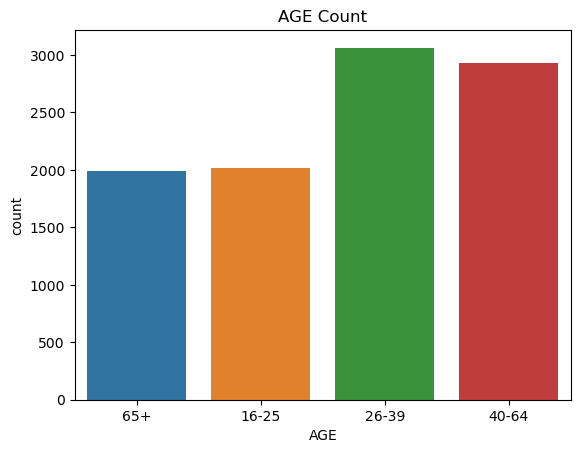

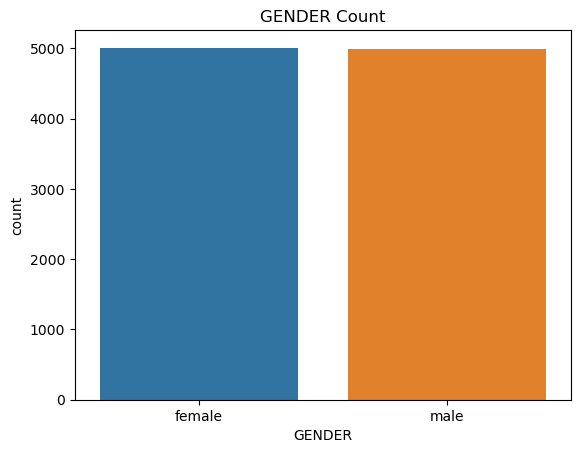

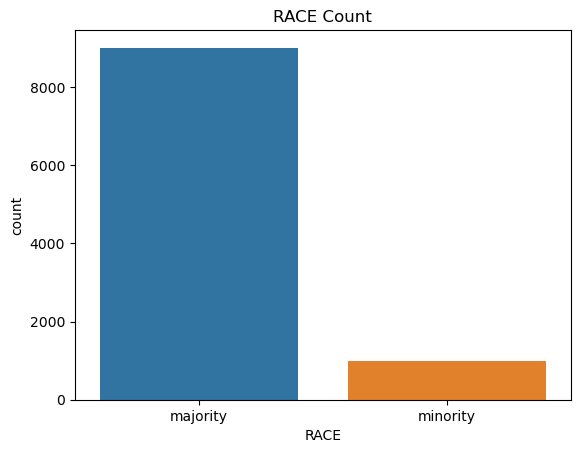

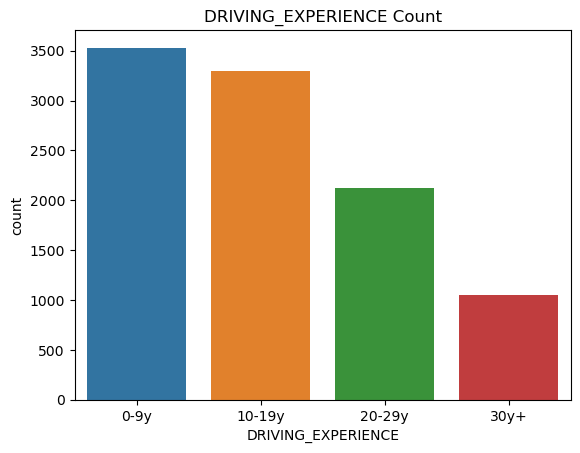

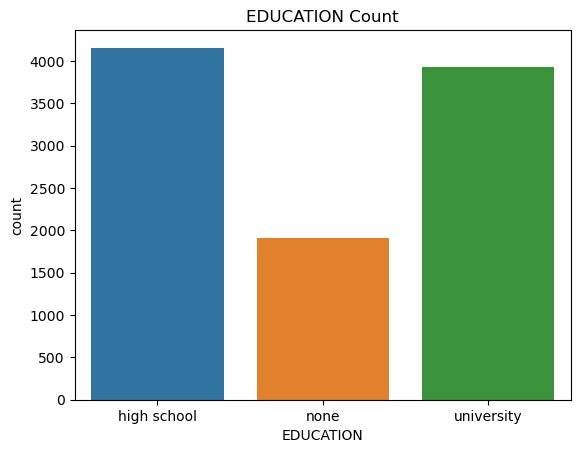

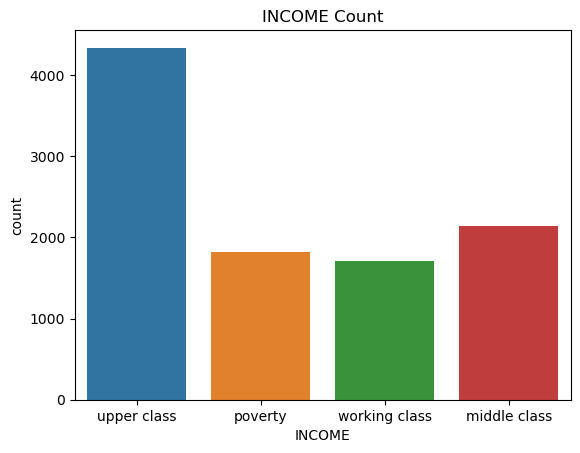

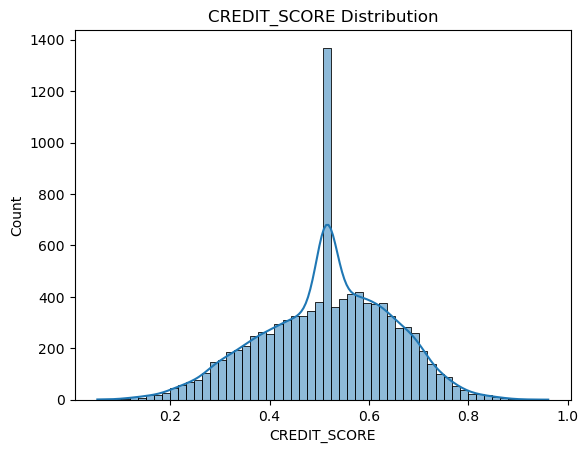

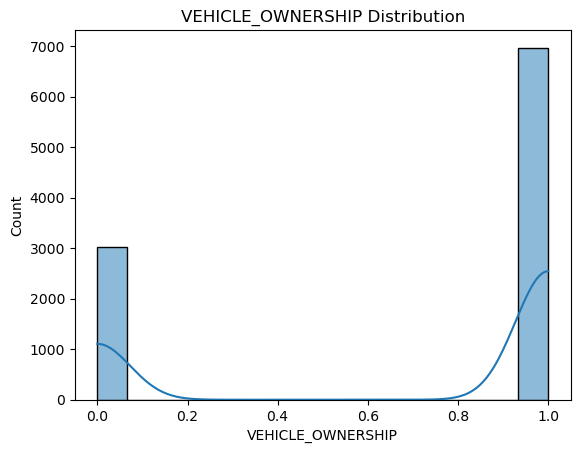

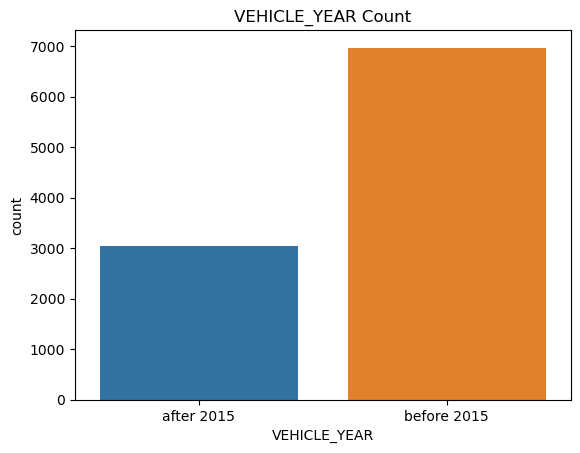

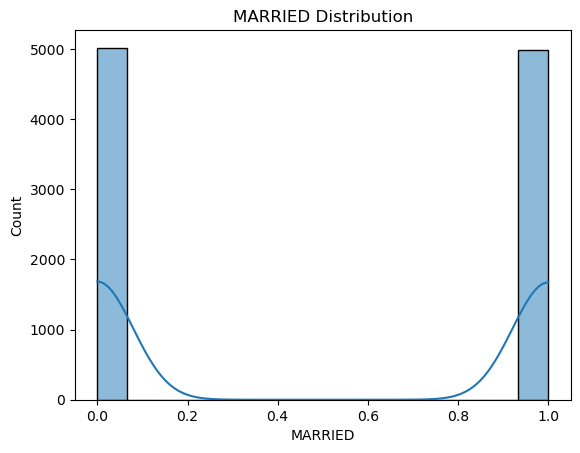

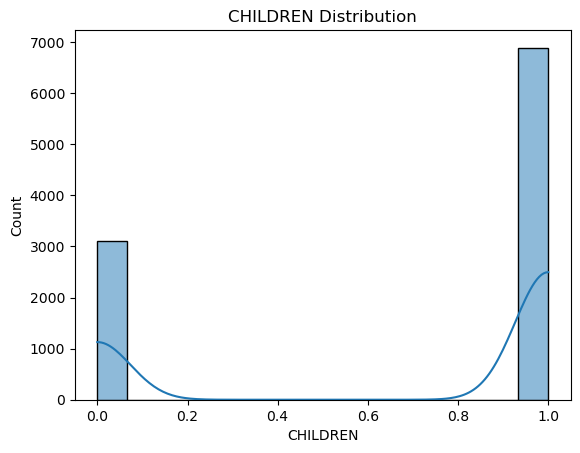

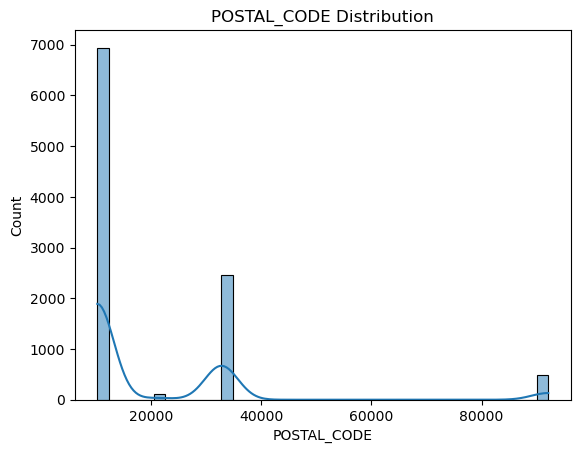

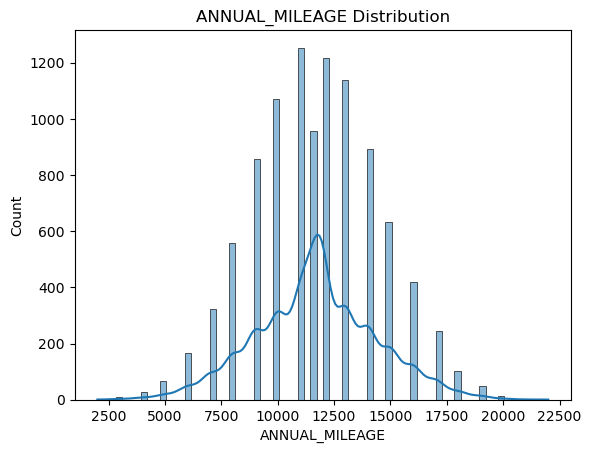

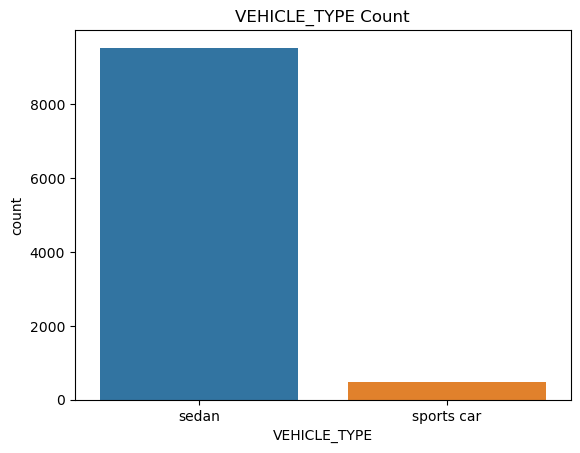

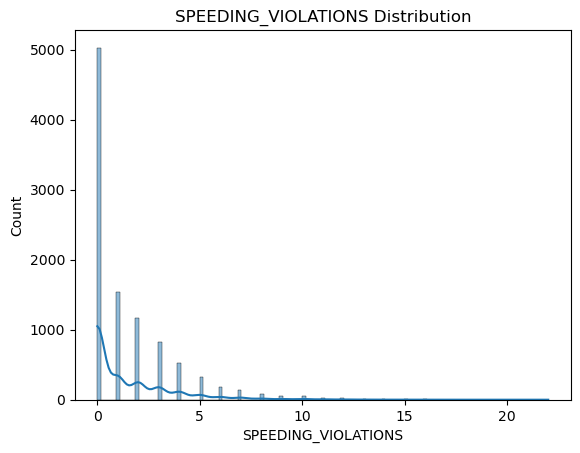

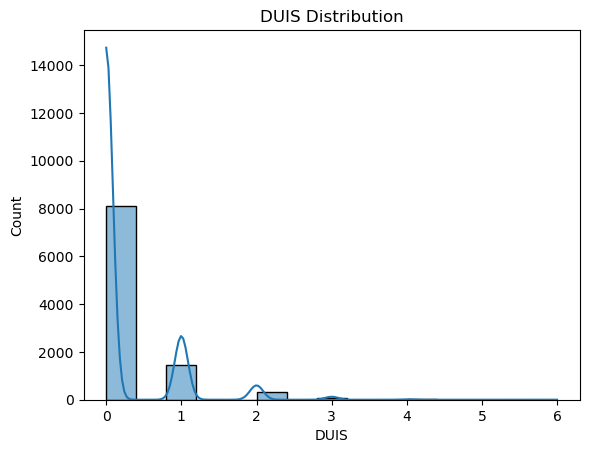

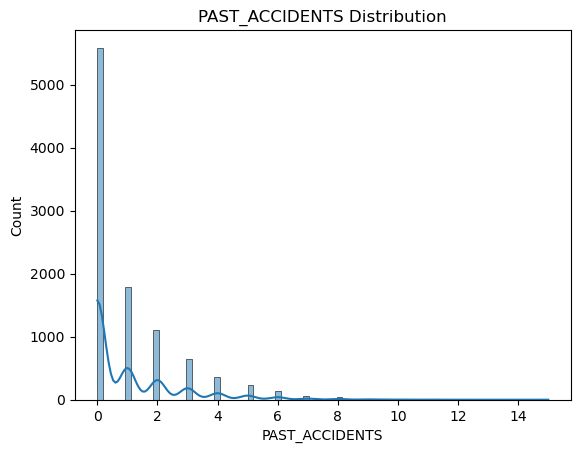

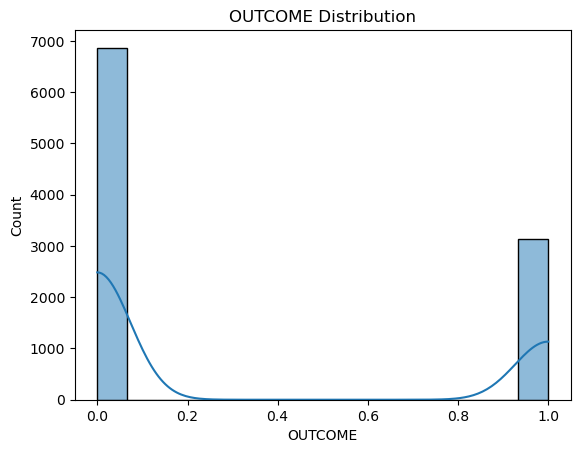

In [27]:
# Function to create univariate visuals for each column in the DataFrame, excluding 'ID' or 'id'
def create_univariate_visuals(df):
    for col in df.columns:
        if col.lower() == 'id':  # Skip 'ID' or 'id' column
            continue
        if df[col].dtype in ['int64', 'float64']:
            plt.figure()
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'{col} Distribution')
        elif df[col].dtype == 'object' or df[col].dtype == 'bool':
            plt.figure()
            sns.countplot(data=df, x=col)
            plt.title(f'{col} Count')
# Create univariate visuals for car.csv dataset
create_univariate_visuals(car_df)
# Show the plots
plt.show()

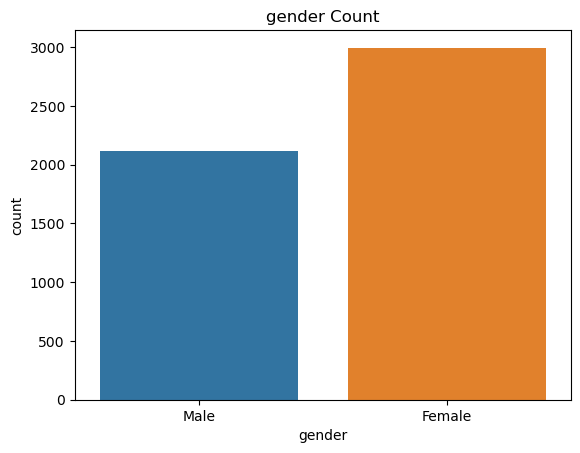

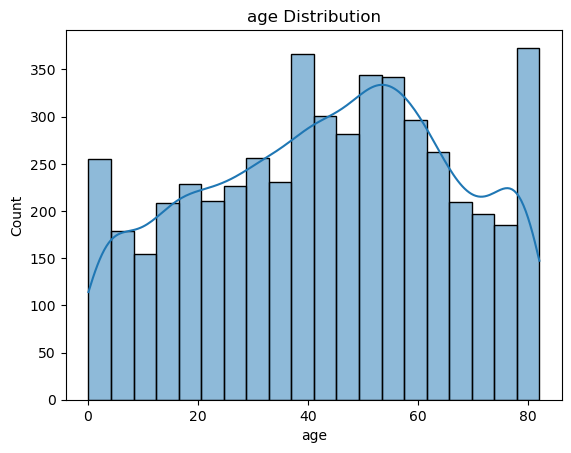

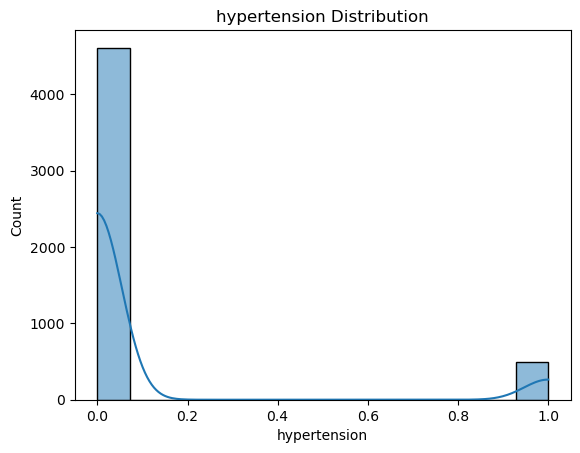

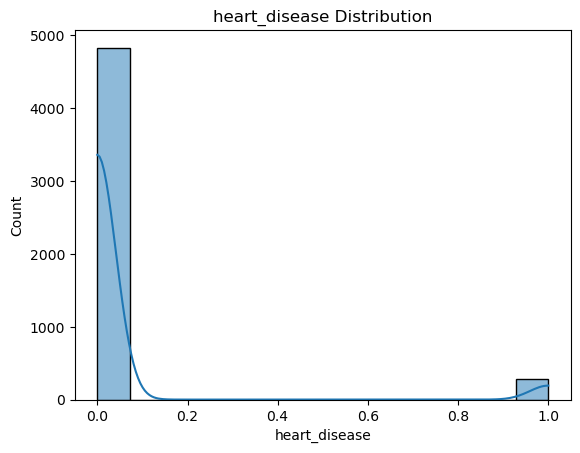

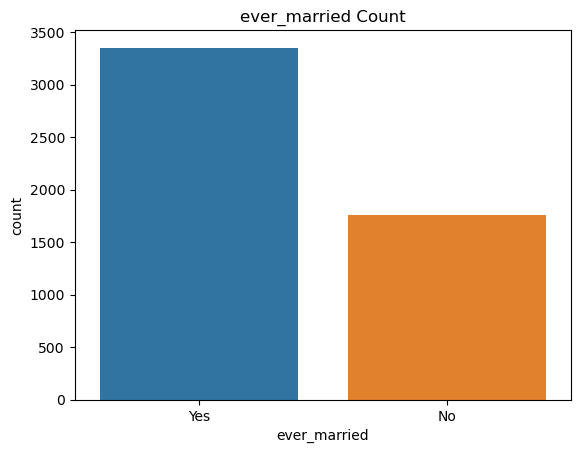

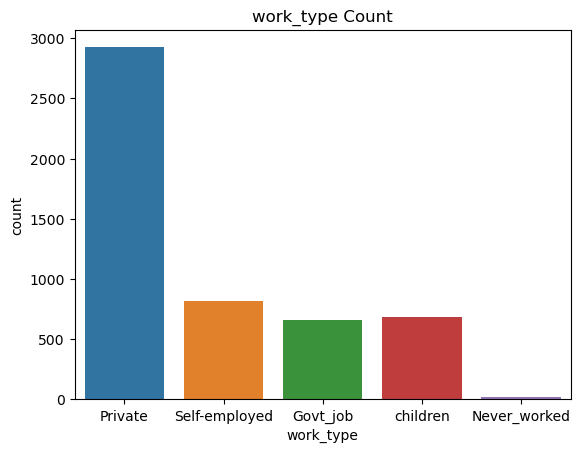

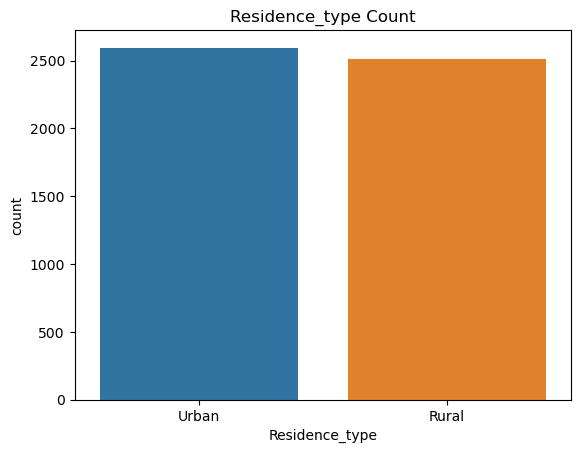

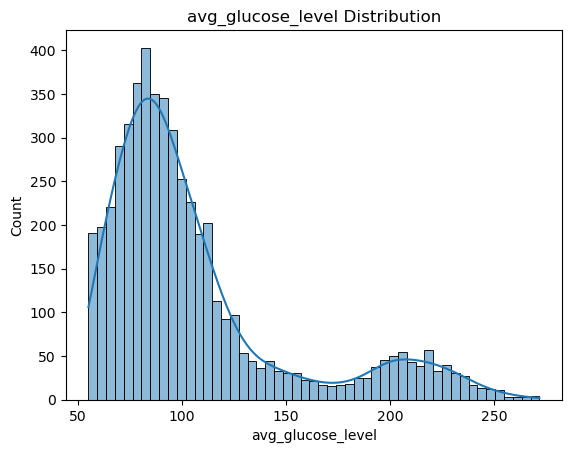

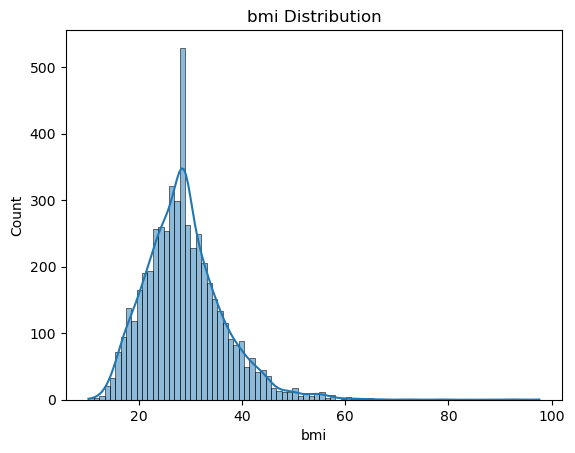

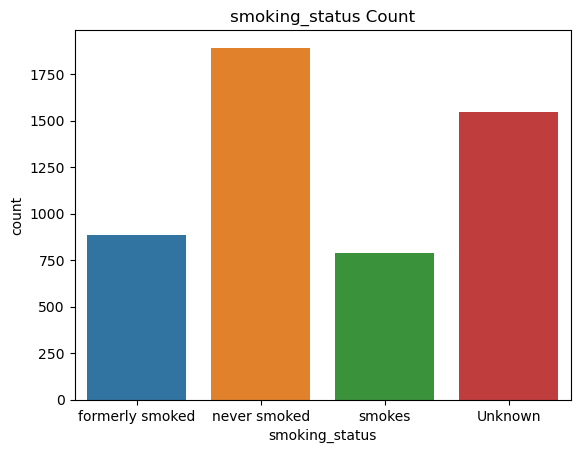

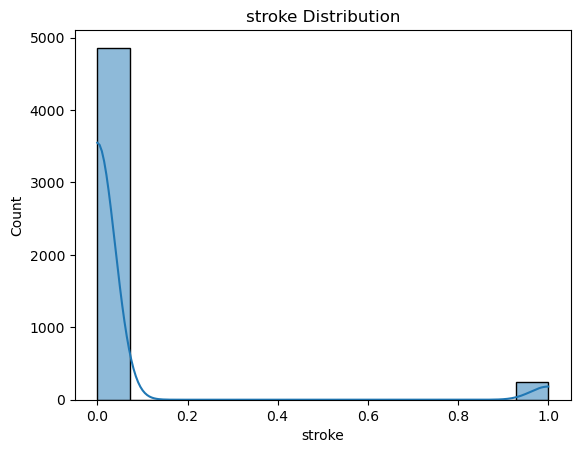

In [28]:
# Create univariate visuals for stroke.csv dataset
create_univariate_visuals(stroke_df)

# Show the plots
plt.show()

In [39]:
# Define a function to create a correlation heatmap for a given dataset
def create_heatmap(df, title):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)

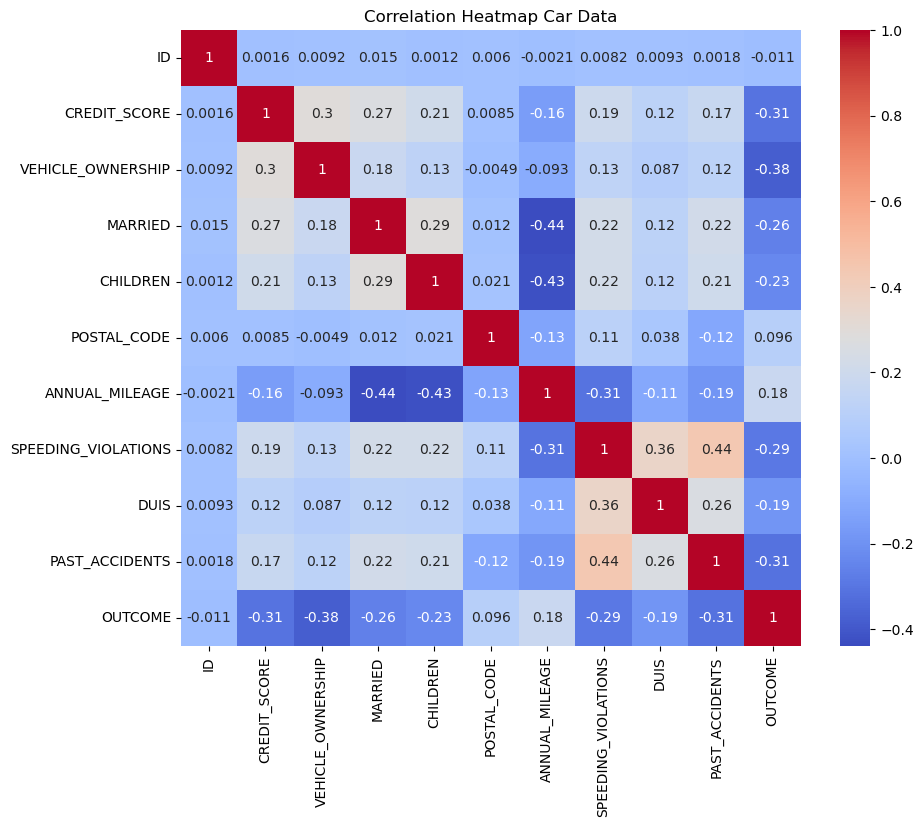

In [40]:
# Create a correlation heatmap for car.csv dataset
create_heatmap(car_df, 'Correlation Heatmap Car Data')

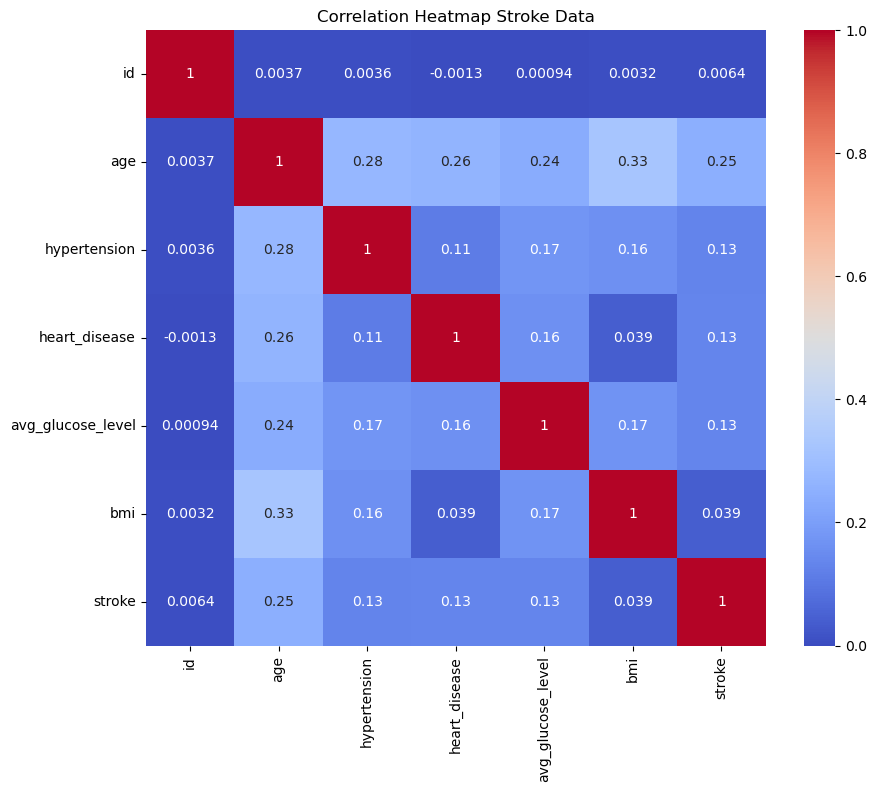

In [41]:
# Create a correlation heatmap for stroke.csv dataset
create_heatmap(stroke_df, 'Correlation Heatmap Stroke Data')

Text(0.5, 1.0, 'Scatter Plot of Past Accidents and Speeding Violations in Car Data')

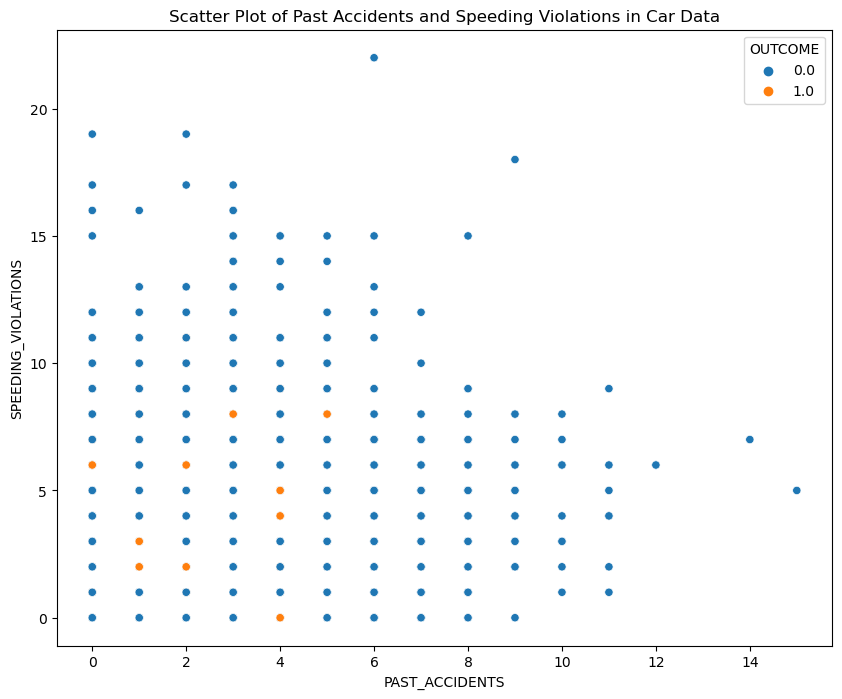

In [42]:
# Scatter plot of past accidents and speeding violations for the car data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=car_df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS', hue='OUTCOME')
plt.title('Scatter Plot of Past Accidents and Speeding Violations in Car Data')

With a .44 correlation score, the graph above demostrates the relationship between Past Accidents and Speeding Violations.

Text(0.5, 1.0, 'Scatter Plot of Age and BMI in Stroke Data')

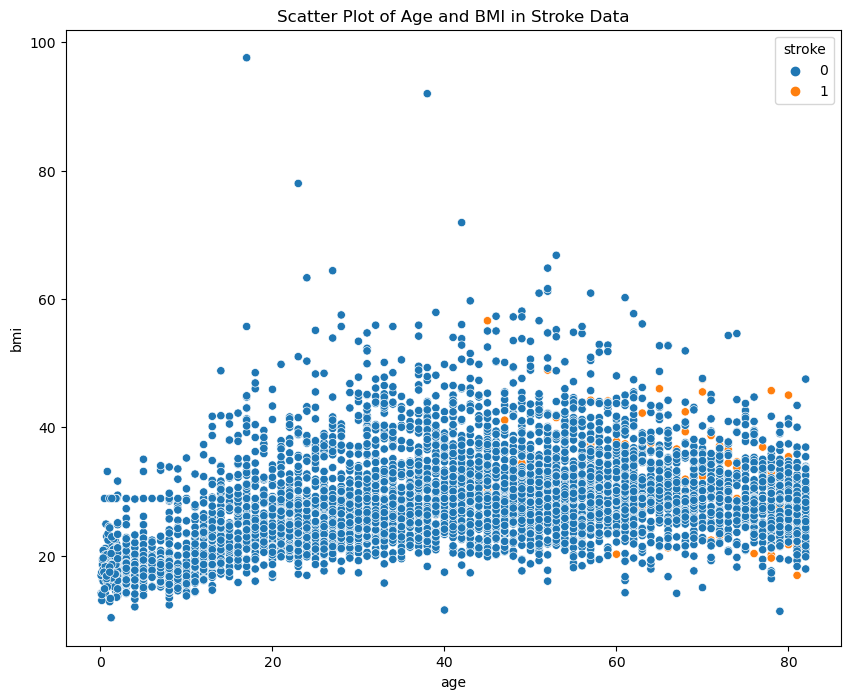

In [43]:
# Scatter plot of age and bmi for the stroke data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=stroke_df, x='age', y='bmi', hue='stroke')
plt.title('Scatter Plot of Age and BMI in Stroke Data')

With a correlation score of .33 we can see that the connection between age and BMI is certainly present.

In [66]:
# Function to preprocess data
def preprocess_data(df, target_column):
    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # One-hot encode categorical features
    categorical_columns = X.select_dtypes(include=['object']).columns
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_columns)], remainder='passthrough')
    X_encoded = ct.fit_transform(X)
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    # Standardize numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [67]:
# Function to fit and evaluate models
def fit_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    model_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_metrics = {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'precision': precision_score(y_train, y_train_pred),
            'recall': recall_score(y_train, y_train_pred),
            'f1_score': f1_score(y_train, y_train_pred)
        }
        
        test_metrics = {
            'accuracy': accuracy_score(y_test, y_test_pred),
            'precision': precision_score(y_test, y_test_pred),
            'recall': recall_score(y_test, y_test_pred),
            'f1_score': f1_score(y_test, y_test_pred)
        }
        
        model_results[model_name] = {'train': train_metrics, 'test': test_metrics}
        
    return model_results

In [68]:
# Function to perform PCA
def perform_pca(X_train, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    return X_train_pca, X_test_pca

In [69]:
# Preprocess data
car_X_train, car_X_test, car_y_train, car_y_test = preprocess_data(car_df, 'OUTCOME')
stroke_X_train, stroke_X_test, stroke_y_train, stroke_y_test = preprocess_data(stroke_df, 'stroke')

In [70]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [71]:
# Fit and evaluate models
car_results = fit_and_evaluate_models(models, car_X_train, car_X_test, car_y_train, car_y_test)
stroke_results = fit_and_evaluate_models(models, stroke_X_train, stroke_X_test, stroke_y_train, stroke_y_test)

/Users/pcsindustries/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# Print results
print("Car Data Results:\n", car_results)
print("\nStroke Data Results:\n", stroke_results)

Car Data Results:
 {'Logistic Regression': {'train': {'accuracy': 0.84475, 'precision': 0.7688034188034188, 'recall': 0.7196, 'f1_score': 0.7433884297520661}, 'test': {'accuracy': 0.841, 'precision': 0.774869109947644, 'recall': 0.7014218009478673, 'f1_score': 0.736318407960199}}, 'Decision Tree': {'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'test': {'accuracy': 0.7775, 'precision': 0.6525974025974026, 'recall': 0.6350710900473934, 'f1_score': 0.6437149719775821}}, 'Random Forest': {'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'test': {'accuracy': 0.828, 'precision': 0.7632058287795993, 'recall': 0.6619273301737757, 'f1_score': 0.7089678510998307}}}

Stroke Data Results:
 {'Logistic Regression': {'train': {'accuracy': 0.9544898458527037, 'precision': 1.0, 'recall': 0.0053475935828877, 'f1_score': 0.010638297872340425}, 'test': {'accuracy': 0.9393346379647749, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}}, 'Decision

In [75]:
# Perform PCA
car_X_train_pca, car_X_test_pca = perform_pca(car_X_train, car_X_test, n_components=0.95)
stroke_X_train_pca, stroke_X_test_pca = perform_pca(stroke_X_train, stroke_X_test, n_components=0.95)

In [76]:
# Fit and evaluate models after PCA
car_results_pca = fit_and_evaluate_models(models, car_X_train_pca, car_X_test_pca, car_y_train, car_y_test)
stroke_results_pca = fit_and_evaluate_models(models, stroke_X_train_pca, stroke_X_test_pca, stroke_y_train, stroke_y_test)

/Users/pcsindustries/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pcsindustries/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# Print results
print("Car Data Results after PCA:\n", car_results_pca)
print("\nStroke Data Results after PCA:\n", stroke_results_pca)

Car Data Results after PCA:
 {'Logistic Regression': {'train': {'accuracy': 0.835, 'precision': 0.7589991220368745, 'recall': 0.6916, 'f1_score': 0.7237337798241942}, 'test': {'accuracy': 0.83, 'precision': 0.7728119180633147, 'recall': 0.655608214849921, 'f1_score': 0.7094017094017094}}, 'Decision Tree': {'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'test': {'accuracy': 0.756, 'precision': 0.6117103235747303, 'recall': 0.627172195892575, 'f1_score': 0.6193447737909515}}, 'Random Forest': {'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}, 'test': {'accuracy': 0.8315, 'precision': 0.7813688212927756, 'recall': 0.6492890995260664, 'f1_score': 0.7092320966350302}}}

Stroke Data Results after PCA:
 {'Logistic Regression': {'train': {'accuracy': 0.9542451676046, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}, 'test': {'accuracy': 0.9393346379647749, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}}, 'Decision Tree': {'train': 

Car Data:
I would choose the Logistic Regression model as the production model for the car dataset. The main reason is that it achieves a good balance between accuracy, precision, recall, and F1-score on the test dataset. It is important to note that while the Decision Tree and Random Forest models have perfect performance on the training dataset, they suffer from overfitting, which is evident from the significant drop in performance on the test dataset.

Stroke Data:
It seems like the dataset is highly imbalanced, as most models have poor recall and F1-scores. In this case, I would choose the Decision Tree model as the production model because it has the highest F1-score on the test dataset (0.129) compared to Logistic Regression and Random Forest, which have F1-scores of 0. In an imbalanced dataset like this, focusing on F1-score is a better choice, as it considers both precision and recall. However, I would strongly recommend using additional techniques, such as oversampling, undersampling, or generating synthetic samples, to balance the dataset and improve the model's performance.